In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sn


/home/bears_bears/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/bears_bears/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
header = ["ydiffs","heights","distances","angles"] 

In [3]:
def aux_to_df(aux):
    """
    Load the tracks data into a dataframe for one aux. input
    NB : Comma is used for the decimals
    """
    aux = str(aux)
    files = glob.glob(os.path.join(f"../Tracks/{aux}", "*.csv"))

    df  = pd.concat((pd.read_csv(f, sep=";", decimal=".", names=header, skiprows=[0]) for f in files),
                   ignore_index=True)
    return df 

In [4]:
# Loads the Data
df1 = aux_to_df(1)
dfm1 = aux_to_df(-1)

# auxiliary inputs
auxs = [-5, -2, -1, -0.5, 0, 0.5, 1, 2, 5]
# dictionary of dataframes of each aux input
dfs = dict(zip(auxs, [aux_to_df(i) for i in auxs])) 

In [5]:
dfs[2]

,ydiffs,heights,distances,angles
0,-1.551573,3.450421,1.833669,-40.23649
1,-0.771802,3.859827,2.224989,-19.13058
2,-0.998404,3.518526,1.938656,-27.24839
3,-0.564137,3.986659,1.646407,-18.91389
4,-0.647125,3.229881,2.190810,-16.45618
...,...,...,...,...
670,-0.904464,3.243974,2.340877,-21.12545
671,-0.763923,3.084576,2.465399,-17.21600
672,-0.696079,3.766440,2.497282,-15.57500
673,-1.176784,3.906263,2.230246,-27.81826


# Plots

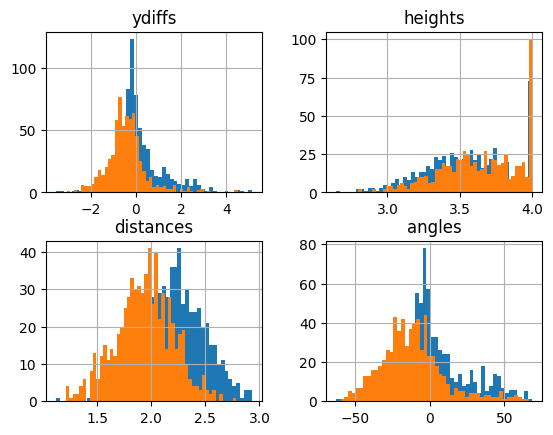

In [6]:
# Plot hist
ax = df1.hist(bins=50, label=1)
ax = dfm1.hist(bins=50, ax=ax, label=-1)

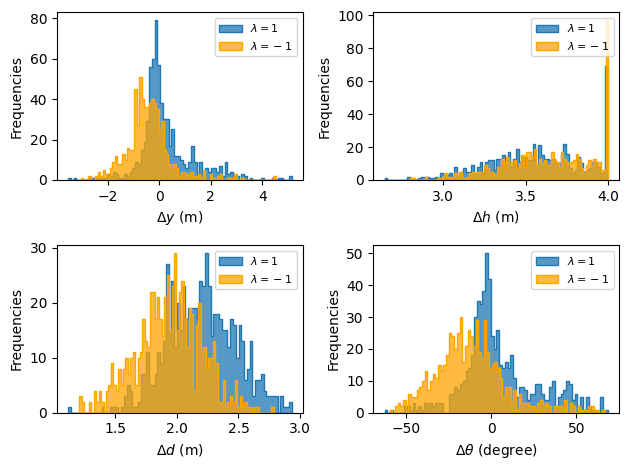

In [7]:
plt.Figure(figsize=(50, 50))
labels = [r"$\Delta y$ (m)", r"$\Delta h$ (m)", r"$\Delta d$ (m)", r"$\Delta \theta$ (degree)"]
common_params = {
    "element":"step",
    "bins":80}
for i,col in enumerate(df1.columns):
    ax_col = plt.subplot(2,2,i+1)
    sn.histplot(dfs[1][col], ax=ax_col,**common_params)
    sn.histplot(dfs[-1][col], ax=ax_col, color='orange', **common_params)
#     sn.histplot(dfs[0][col], ax=ax_col, color='darkgreen', alpha=.4, element="step", bins=80)
#     ax_col.legend([f"$\lambda={1}$", f"$\lambda={-1}$"])
    ax_col.set_xlabel(labels[i])
    ax_col.set_ylabel("Frequencies")
    ax_col.legend([f"$\lambda={1}$", f"$\lambda={-1}$"], loc='best', fontsize=8)
# ax_col.legend(bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("images/Curr42d_env_distribution.pdf", dpi=70)

# Medians of the parameters of the test environments

In [8]:
# pd.DataFrame(dfs["1"].median()).transpose().index
med_df = pd.DataFrame({lam:dfs[lam].median() for lam in auxs}).transpose()
med_df.index.name = r"$\lambda$"
med_df.index = med_df.index.format(":.1f")[1:]
print(med_df.to_latex(float_format="%.3f"))
# med_df


\begin{tabular}{lrrrr}
\toprule
 & ydiffs & heights & distances & angles \\
\midrule
-5.0 & -0.085 & 3.776 & 1.762 & -2.699 \\
-2.0 & -0.466 & 3.672 & 1.884 & -13.742 \\
-1.0 & -0.465 & 3.650 & 1.945 & -13.358 \\
-0.5 & -0.412 & 3.632 & 2.004 & -11.843 \\
 0.0 & -0.240 & 3.621 & 2.047 & -6.543 \\
 0.5 & 0.159 & 3.561 & 2.128 & 4.478 \\
 1.0 & -0.035 & 3.560 & 2.199 & -0.774 \\
 2.0 & -0.069 & 3.572 & 2.400 & -1.340 \\
 5.0 & 1.028 & 3.769 & 3.000 & 19.055 \\
\bottomrule
\end{tabular}



In [19]:
med_df.iloc[2:-2]

,ydiffs,heights,distances,angles
-1.0,-0.465315,3.650172,1.945410,-13.357650
-0.5,-0.412091,3.631803,2.003774,-11.843280
0.0,-0.240286,3.620595,2.046722,-6.543162
0.5,0.159250,3.561283,2.128331,4.477503
1.0,-0.034608,3.560121,2.199296,-0.774029


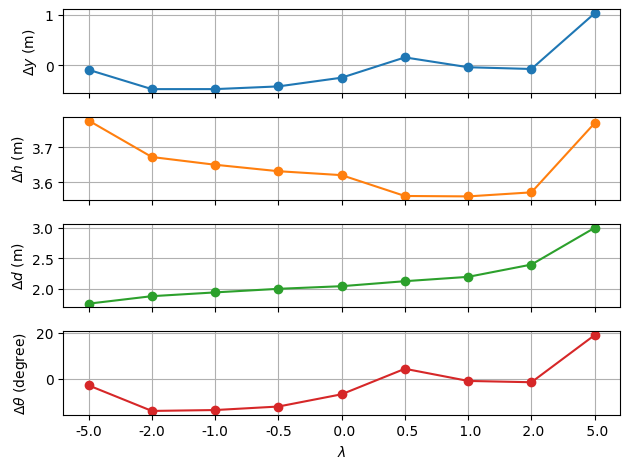

In [9]:
axs = med_df.plot(kind="line", marker="o", subplots=True, layout=(4,1), legend=None).reshape(-1)
labels = [r"$\Delta y$ (m)", r"$\Delta h$ (m)", r"$\Delta d$ (m)", r"$\Delta \theta$ (degree)"]
for i, ax in enumerate(axs):
    ax.set_ylabel(labels[i])
    ax.set_xlabel(r"$\lambda$")
    ax.grid()
    ax.set_xlim
plt.tight_layout()
plt.savefig("images/Median_plot_Curr42d.pdf")

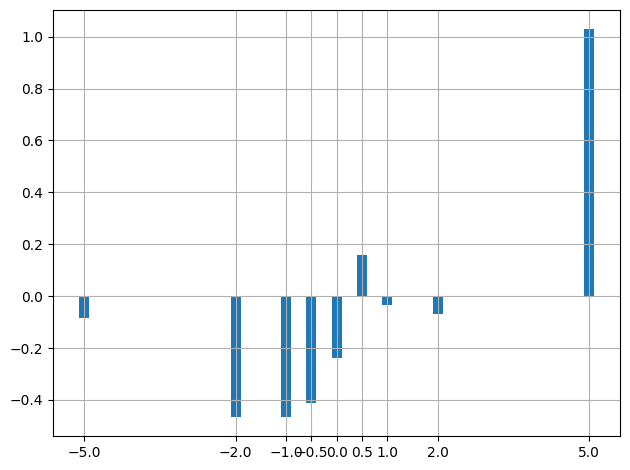

In [10]:
plt.bar(auxs, med_df["ydiffs"], width=.2)
plt.grid()
plt.xticks(auxs)
plt.tight_layout()